In [ ]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
   """
   Read the custom CSS file and load it into Jupyter.
   Pass the file path to the CSS file.
   """

   styles = open(css_file_path, "r").read()
   s = '<style>%s</style>' % styles     
   return HTML(s)

_set_css_style('custom/custom.css')

<div style='float:center; margin-right:20pt; width:30em'><img src='img/logo-igm.png'></div>
<div style='float:center; font-size:large'>
    <strong>Algorithmique et programmation 2</strong><br>
    L1 Mathématiques - L1 Informatique<br>
    Semestre 2
</div>

# Préambule : contenu du cours AP2

### Algorithmique :

- Récursivité : fonctions et structures de données récursives
- Éléments de complexité algorithmique
- Algorithmes de recherche (dichotomie...)
- Algorithmes de tri et applications
- Piles et files (implémentation, applications...) <span class=remarque>— si on a le temps</span>

### Programmation :

- Le point sur les types Python
- Détails sur les fonctions
- Tests, mesures de performance, débuggage...
- Nouvelles fonctionnalités du langage (classes...) <span class=remarque>— si on a le temps</span>

Et toujours [fltk](https://antoinemeyer.frama.io/fltk/) pour les interface graphiques *(attention ! télécharger la version la plus récente !)*

### Volume et évaluation :

- 9 * (cours de 2h + TD de 2h + TP de 2h)
- Note finale : contrôle continu intégral
    - 2 devoirs sur table (CC1, CC2)
    - Note de TP (présence, motivation, travail)
    - Formule (provisoire) : (4 x CC1 + 5 x CC2 + TP) / 10
- 5 ECTS


### Aménagements :

- Séances de révision / remédiation en fin de semestre (détails à venir)
- <span class=defterm>UE de projet séparée</span> (Pr2, sur 2 ECTS, les 3 dernières semaines - responsable : Nadime Francis)

### Dates des CC (provisoires) :

- CC1 la semaine du 9 mars
- CC2 la semaine du 11 mai

### Quelques conseils

- Venez à toutes les séances (cours, TD, TP)
- Faites le maximum d'exos en TD, en TP et chez vous
- Posez des questions à vos profs et camarades (Discord, forum, mail)
- Pratiquez en dehors des cours  
  <span class=remarque>(nombreux outils en ligne disponibles : PLaTon, http://www.sololearn.com/, http://projecteuler.net/, http://codingame.com...)</span>

# Le point sur les types en Python

Références :
- https://docs.python.org/fr/3/library/stdtypes.html
- https://docs.python.org/fr/3/reference/datamodel.html (début)
- https://docs.python.org/fr/3/reference/executionmodel.html

## Variables, le retour

- Une **valeur** est un objet présent dans la mémoire  
  <span class=remarque>(plus de détails plus bas)</span>
- En Python, une **variable** est un **nom** associé à une valeur
- Cette association est **temporaire**
- L'action d'associer une valeur à un nom est l'**affectation**
- Une même variable peut désigner plusieurs valeurs successives

In [ ]:
a = 2             # a désigne un entier
print(a, type(a))

a = 'salut !'     # a désigne une chaîne
print(a, type(a))

a = [2, 3, 4]     # a désigne une liste
print(a, type(a))

b = a             # a et b désignent le même objet
b[1] = 1
print(a, b)

#### Exercice 

**Lien Wooclap :** https://app.wooclap.com/events/NCCSLU  
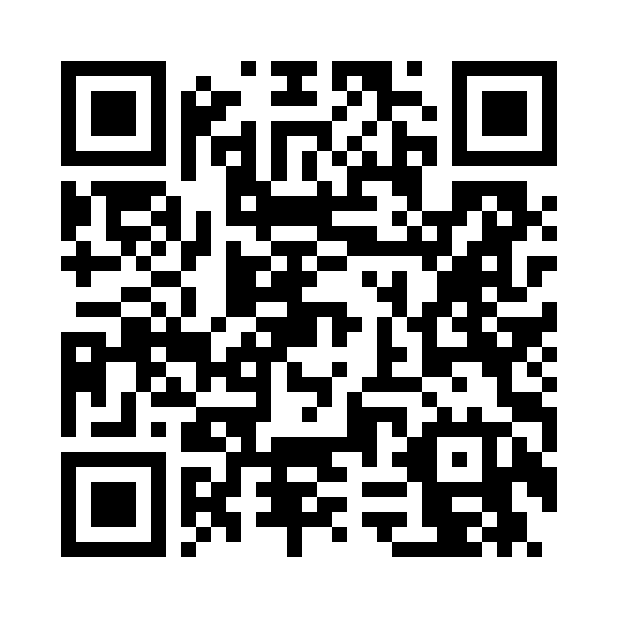

- Dessiner l'état de la mémoire après l'exécution de la cellule suivante.
- Quelle est la valeur finale de `lst2` ?

In [ ]:
a = 1
lst = [a, a, a]
a = 2
lst2 = [lst, lst, a]
lst2[0][0] = a
lst[1] = 3

In [ ]:
lst2

## Espaces de noms

- Un ensemble de noms définis en un point du programme est un **espace de noms**
- Plusieurs espaces de noms "imbriqués" :
    - L'espace de nom *local* pendant un appel de fonction
    - L'espace de nom *global* (module principal)
    - L'espace des noms *prédéfinis* ou **built-ins**  
      <span class=remarque>(ex : `print, True, min, ...`)</span>
    - *Éventuellement d'autres espaces intermédiaires*
- Dans chaque contexte on a accès aux espaces de noms extérieurs

In [ ]:
# liste des noms de l'espace global
dir()  # contient lst, lst2, etc.

In [ ]:
# la même chose sous forme de dictionnaire nom -> valeur
globals()

In [ ]:
def f(truc, machin):
    chose = [4, 5]
    print(locals())  # noms de l'espace local

f(1, 5)
print(chose)

In [ ]:
# liste des noms prédéfinis
dir(__builtin__)  # contient len, print, dir, etc.

#### Import de noms

La commande `import` permet de charger de nouveaux noms (d'objets de tous types) dans l'espace de noms courant

In [ ]:
import math
dir(math)  # espace de noms du module math

In [ ]:
type(math)

In [ ]:
pi

In [ ]:
math.pi

In [ ]:
math.cos

Plutôt que d'importer un module entier on peut choisir certains de ses éléments (ou tous)

In [ ]:
from math import pi, cos
cos(pi)

Attention, si l'on importe un nom à l'intérieur d'une fonction, ce nom n'existe que dans l'espace de noms local !

In [ ]:
def foo():
    from math import tan
    return tan(pi/4)

In [ ]:
foo()

In [ ]:
tan(pi/4)

## Valeurs = objets

En Python, *tout* (un entier, une liste, une fonction) est un **objet**
- Chaque valeur (chaque objet, donc) consiste en un
  **type** et des **données** (ou **attributs**)
- Chaque objet manipulé est créé en **mémoire**, puis
  détruit quand il n'est plus utilisé
- Chaque objet possède un **identifiant entier** unique accessible par la fonction `id()` (*"numéro d'identification"*, assimilable à une *adresse mémoire*)

In [ ]:
a = 14
b = 7
print(id(a), id(b))
b = a
print(id(a), id(b))

**Nouvel opérateur :** `is` / `is not` compare les `id` de deux objets
- `exp1 == exp2` teste si deux objets sont "égaux"
- `exp1 is exp2` teste si `exp1` et `exp2` désignent le **même** objet dans la mémoire

In [ ]:
a = 14
b = 7
print(a == b, a is b)
b = a
print(a == b, a is b)

In [ ]:
a = []
b = []
print(a == b, a is b)
b = a
print(a == b, a is b)

In [ ]:
a = []
b = []
a.append(1)
print(a, b)

In [ ]:
a = []
b = a
a.append(1)
print(a, b)

## Retour sur les mécanismes de base

#### Affectation : `var = expr`

- Calculer `expr` renvoie un objet `obj` stocké en mémoire
- (Si `var` n'existe pas, on la crée dans l'espace de noms courant)
- On associe `id(obj)` à `var` dans l'espace de noms courant

Cas particulier : `var1 = var2` :
- On associe simplement à `var1` l'identifiant `id(var2)`
- On obtient deux noms faisant référence au même objet

#### Passage de paramètre : `f(a1, a2, a3)`


Lors d'un appel de la forme `f(e1, e2, e3...)` :
  - Les trois expressions `e1`, `e2`, `e3`... sont
    évaluées en des objets `o1`, `o2`, `o3`...
  - On associe aux noms `a1`, `a2`, `a3`... les identifiants `id(o1)`, `id(o2)`, `id(o3)`...
    dans l'espace de noms local de `f`
  - **Il n'y a pas de création de nouveaux objets !**
  - On dit que Python a une politique de passage de paramètres **par référence** (sans recopie)
    

In [ ]:
def pgcd(a, b):
    while b != 0:
        a, b = b, a%b
    return a

m = (2*5)*2*5*5
n = (2*5)*3*3*7
res = pgcd(m, n)
print(res)

#### Retour de fonction : `return expr`

  - L'expression `expr` est évaluée en un objet `obj`
  - L'identifiant `id(obj)` est transmis au site d'appel, qui
      en fait ce qu'il veut (`print`, affectation, usage dans une expression...)
  - **Il n'y a pas de création d'un nouvel objet !**
  - Le renvoi de résultat est donc aussi effectué **par référence**

## Le point sur les types

**Exercice Wooclap**

- Il existe plusieurs grandes catégories d'objets : nombres, séquences, etc.
- Le type d'un objet détermine ce qu'on a le droit de faire avec
- Documentation : https://docs.python.org/fr/3/library/stdtypes.html

Chaque type peut avoir un certain nombre de caractéristiques :
    
- Numérique : peut être utilisé dans une expression arithmétique
- Collection / conteneur : permet l'utilisation de l'opérateur `in` 
- Séquentiel : permet l'accès par indices (entiers) avec des crochets `[...]`
- Itérable : permet un parcours à l'aide d'une boucle `for`
- Modifiable (mutable) : permet une modification *sur place* de l'objet en mémoire

### Nombres (`int`, `float`, `complex`)
  
- Types numériques et immutables
- Nombreuses opérations arithmétiques disponibles

#### Type `int`

- Nombres entiers arbitrairement grands  
  *(attention au coût en calcul !)*

In [ ]:
2 ** 10000

In [ ]:
n = 0

In [ ]:
%%time
# %%time permet de chronométrer la cellule dans Jupyter
s = sum(range(n, n+10000))

In [ ]:
n = 2**10000

In [ ]:
%%time
s = sum(range(n, n+10000))

- Optimisation pour les petits entiers : un seul objet  par entier entre -5 et 256
  (pré-alloué et partagé), plusieurs objets de même valeur au-delà

In [ ]:
# Les "petits" entiers sont partagés en mémoire
a = 256
b = 256
a is b

In [ ]:
# Les "grands" entiers ne le sont pas
a = 257
b = 257
a is b

#### Type `float`

- Nombres à "virgule flottante"  
  *(précision et amplitude limitées)*

In [ ]:
# Les flottants ont une précision limitée
0.1 * 3 == 0.3

In [ ]:
0.1 * 3

In [ ]:
0.3

In [ ]:
2.0 ** 1024  # avec 1023 ça passe !

In [ ]:
2.0 ** -1075  # avec -1074 ça passe !

#### Type `complex`

- Nombres complexes à partie réelle et
  imaginaire flottante  

In [ ]:
# On peut manipuler directement des nombres complexes
3+5j

In [ ]:
(3+5j) * (2 + 1j)

In [ ]:
(3 + 5j).imag

In [ ]:
# Mais il faut prendre la bonne version des fonctions...
from math import sqrt
sqrt(-1)

In [ ]:
from cmath import sqrt
sqrt(-1)

#### Autres types numériques

- `Fraction` : nombres rationnels
- `Decimal` : nombres à virgule en précision arbitraire
- ...

In [ ]:
from fractions import Fraction
3 * Fraction(1, 10) == Fraction(3, 10)

In [ ]:
from decimal import Decimal
3 * Decimal(1) / Decimal(10) == Decimal(3) / Decimal(10)

Plus de détails en L2 dans l'UE "Labo math-info" !

### Booléens (`bool`)
  
- Type numérique (assimilé à $\{0, 1\}$) et immutable
- Nombreuses opérations entre booléens ou produisant des booléens
    - opérateurs logiques (`and`, `or`, `not`)
    - comparaison, égalité, etc.
- **Attention :** comparer deux valeurs de type différent
    donne en général `False` ou une erreur -- sauf pour les nombres

In [ ]:
'1' == 1

In [ ]:
'1' != 1

In [ ]:
'1' <= 1

In [ ]:
True == 1 == 1.0  # seule exception !

In [ ]:
True <= 14 <= 14.0  # seule exception !

#### Aspect séquentiel (ou paresseux, *lazy*) des opérateurs logiques

**Exercice :** cette fonction est-elle juste quelle que soit la valeur de `lst` ?

In [ ]:
def commence_par_un(lst):
    return lst[0] == 1

Même question :

In [ ]:
def commence_par_un(lst):
    return lst[0] == 1 and len(lst) > 0

Même question :

In [ ]:
def commence_par_un(lst):
    return len(lst) > 0 and lst[0] == 1

**Exercice :** écrire sur le même modèle une fonction `ne_commence_pas_par_un` (sans utiliser `if` ni l'opérateur `not`)

In [ ]:
def ne_commence_pas_par_un(lst):
    return ...

#### Explication : équivalent avec `if`

Opérateur `a and b` à peu près équivalent à la fonction

In [ ]:
def fonction_and(a, b):
    if a:
        return b
    else:
        return a  # on n'a pas évalué b !

et `or` à la fonction

In [ ]:
def fonction_or(a, b):
    if a:
        return a  # on n'a pas évalué b !
    else:
        return b

#### Deuxième exemple

**Exercice :** corriger cette fonction pour qu'elle soit correcte même si `n == 0`, sans utiliser `if` (rappel : une matière n'est *pas* validée si on n'a aucune note)

In [ ]:
def matiere_validee(total, n):
    return (total / n) >= 10

#### Interprétation booléenne des autres types

En Python toute valeur peut être interprétée comme vraie ou fausse  
(en général, 0 ou séquence vide interprétés comme `False`)

In [ ]:
if 0 or 0.0 or '' or [] or {}:
    ...  # jamais exécuté
else:
    print("Toutes ces valeurs veulent dire False !")

In [ ]:
if 1 and 0.01 and 'a' and [42] and {1:1}:
    print("Toutes ces valeurs veulent dire True !")
else:
    ...  # jamais exécuté

#### Un dernier exemple bizarre

In [ ]:
"patate" and "courgette"

In [ ]:
"patate" or "courgette"

### Chaînes  (`str`)
  
- Type conteneur, séquence, itérable et immutable
- Chaînes de caractères non modifiables (codage [UTF-8](https://en.wikipedia.org/wiki/UTF-8))
- [Très nombreuses méthodes](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str)  
  *recherche, remplacement, découpe, changement de casse, etc.*

In [ ]:
s = "Ceci   est un exemple   de  chaîne."
lst = s.split()
lst

In [ ]:
" |-> ".join(lst)

- Optimisation pour certaines chaînes courtes : un seul objet partagé

In [ ]:
a = "abc"
b = "abc"
a is b

In [ ]:
a = "Est-ce que tu aimes les films avec des gladiateurs ?"
b = "Est-ce que tu aimes les films avec des gladiateurs ?"
a is b

- Peuvent s'écrire sur plusieurs lignes avec `'''` ou `"""`  
  *utile pour documenter des fonctions (docstrings)*

In [ ]:
def pgcd(a, b):
    """Calcule le pgcd de deux nombres entiers.
    
    Paramètres :
    a : int
    b : int
    Retour : plus grand diviseur commun à a et b
    
    >>> pgcd(8, 9)
    1
    
    >>> pgcd(12, 18)
    6
    """
    while b:
        a, b = b, a % b
    return a

In [ ]:
pgcd?

In [ ]:
help(pgcd)

In [ ]:
from turtle import forward
help(forward)

-   Test automatique des exemples contenus dans les *docstrings* : module `doctest`

In [ ]:
from doctest import testmod
testmod(verbose=True)

### Listes  (`list`)

- Type conteneur, séquence, itérable et mutable
- Listes hétérogènes d'objets (chaque "case" contient en
    fait un `id` d'objet)
- Nombreuses méthodes disponibles pour chercher, agrandir,
    rétrécir, trier, etc.
 

#### Exercice

- `lst[i:j:k]` construit une liste des éléments
  d'indice `i` à `j-1` de `lst` par pas de `k`
- Écrire une fonction `tranche(lst, i, j, k)` qui
  fasse la même chose **sans modifier `lst` !**

In [ ]:
def tranche(lst, i, j, k):
    """Extrait une sous-liste de lst contenant
    ses éléments d'indices compris entre i et j-1
    par pas de k.
    """
    ...
        

In [ ]:
lst = list("abcdefghijklmnop")
tranche(lst, 3, 8, 2)

#### Exemples d'usage de listes :

- Liste des lignes d'un fichier : `f.readlines()`
- Liste défilante dans un formulaire
- Liste des diviseurs d'un nombre
- Liste des arguments d'une fonction
- Balayage de fonction en analyse (valeurs de $f$ par pas de 0.01)

#### ★ Exercice : *list comprehensions* (mutations de listes)

Si `f` et `p` sont deux fonctions à un argument, l'écriture  `[f(x) for x in iterable if p(x)]`  renvoie la liste des éléments `x` de `iterable` tels que `p(x)` vaut `True`, auxquels on a appliqué `f`

In [ ]:
[abs(n) for n in range(-10, 10) if n % 3 == 0]

Programmer une fonction `mapfilter(iterable, f, p)` construisant et renvoyant cette liste. Exemple :
```python
>>> mapfilter([-1, -2, 3, 1, -4], abs, odd)
[1, 3, 1]
```

In [ ]:
def mapfilter(iterable, f, p):
    ...

In [ ]:
def odd(x):
    return x % 2 == 1

mapfilter([-1, -2, 3, 1, -4], abs, odd)

### Dictionnaires (`dict`)

**Définition :**   Objet associant une liste de *clés* (*keys*) à des *valeurs*
    (*values*)
    
https://docs.python.org/fr/3/tutorial/datastructures.html#dictionaries
    
- Création d'un dictionnaire vide

In [ ]:
vide = {}    # dictionnaire vide
vide

In [ ]:
vide = dict()   # idem
vide

- Création d'un dictionnaire contenant des éléments

In [ ]:
effectif_groupes = {'a': 31, 'bidule': 28.5, 
                    'c': 33, 9: 18, 'Prépa': 22}
effectif_groupes

- Test d'appartenance d'une clé

In [ ]:
'Prépa' in effectif_groupes

In [ ]:
31 in effectif_groupes  # 31 est une valeur, pas une clé !

- Accès à une clé :

In [ ]:
effectif_groupes['Prépa']

In [ ]:
effectif_groupes[31]

- Modification ou création d'une clé

In [ ]:
effectif_groupes['Prépa'] = 23
effectif_groupes['A'] = 150
effectif_groupes

- Objets *itérables* (comme les listes)

In [ ]:
d = {'a': 1, 'b': 42, 'c': 9}
for cle in d:
    print(cle, '->', d[cle])

-   Peuvent être imbriqués (comme les listes)

In [ ]:
d2 = {'type': 'un dico', 'contenu': d, 'taille': len(d)}
d2

#### Dictionnaires *vs.* listes

-   Insertion et suppression *en général* (beaucoup) plus rapides
-   Accès *en général* presque aussi rapide
-   Collections *mutables* et *hétérogènes* (comme les `list`)

**Attention :**
-   Clés obligatoirement immutables, mais peuvent être de plusieurs types différents
-   Valeurs de types quelconques (même mutables)

In [ ]:
d = {True: 1, 'bidule': True, 3.14: 'pi', None: 0}
d

In [ ]:
d[99] = [1, 2, 3, 'nous irons...']
d

In [ ]:
d[[0, 0]] = "origine"

In [ ]:
d[(0, 0)] = "origine"
d

#### Opérations (résumé)

- Création   `d = {}` ou `d = dict()` ou `d = {’a’: 1, ...}`
- Accès : `d[cle]`, `d[cle1][cle2]`, ...
- Taille : `len(d)`
- Test d'appartenance : `cle in d`, `cle not in d`      
- Ajout ou modification : `d[cle] = valeur`
- Suppression : `del d[cle]`
- Itération : `for cle in d`

#### Méthodes

- Accès aux clés : `d.keys()`
- Accès aux valeurs : `d.values()`
- Accès aux couples `(cle, valeur)` : `d.items()`            
- Copie (superficielle) : `d.copy()`             
- Vidange : `d.clear()`
- Accès avec valeur par défaut : `d.get(cle, defaut)`
- Retrait de valeur : `d.pop(cle)`           
- Mise à jour / fusion : `d.update(d2)`

In [ ]:
for cle in d.keys():
    print(cle)

In [ ]:
list(d.keys())

In [ ]:
list(d.values())

In [ ]:
list(d.items())

In [ ]:
d.get('machin', 0)

In [ ]:
d.pop(3.14)

In [ ]:
d[3.14]

**Attention :** la méthode `copy` produit une copie *superficielle* !!

In [ ]:
d = {'lst': [1, 2]}
e = d.copy()
e['lst'].append(3) 
print(d)
print(e)

#### Un exemple : comptage de lettres

In [ ]:
def compte_lettres(chaine):
    d = dict()
    for car in chaine:
        if car in d:
            d[car] += 1
        else:
            d[car] = 1
    return d

s = "Les chaussettes de l'archi-duchesse sont elles sèches ? Archi-sèches."
print(compte_lettres(s))
s = 'exemple'
print(compte_lettres(s))

In [ ]:
def compte_lettres(chaine):
    d = dict()
    for car in chaine:
        # plus pro, plus beau
        d[car] = d.get(car, 0) + 1
    return d

s = "Les chaussettes de l'archi-duchesse sont elles sèches ? Archi-sèches."
print(compte_lettres(s))
s = 'exemple'
print(compte_lettres(s))

#### Afficher les éléments par ordre croissant de clés

In [ ]:
d = compte_lettres('exemple')
cles = list(d.keys())
cles.sort()
for cle in cles:
    print(cle, '->', d[cle])

In [ ]:
# ou :    
for cle in sorted(d.keys()):
    print(cle, '->', d[cle])

#### Un autre exemple : carte de visite

In [ ]:
carte = {'prenom': 'Antoine',
         'nom': 'Meyer',
         'email': '<antoine.meyer@univ-eiffel.fr>'}

def affiche_carte(carte):
    print("Bonjour,")
    print("Je m'appelle", carte['prenom'], carte['nom'], '. ')
    print("Mon adresse email est", carte['email'], end='.\n')

affiche_carte(carte)

#### ★ Un dernier exemple : implémentation des espaces de noms

- Un espace de noms associe en réalité à chaque variable
    l'identifiant de l'objet associé
- Conceptuellement semblable à un dictionnaire
    - Clés : noms actuellement définis
    - Valeurs : identifiants des objets correspondants
- En fait, dans l'implémentation courante de Python, ce *sont* des dictionnaires

In [ ]:
import math
math.__dict__

#### Dictionnaires : pour résumer

- Type conteneur, non séquentiel, itérable et mutable
- Associations de clés (immutables !) avec des valeurs    (quelconques)
- Opération très rapide : recherche d'élément

#### Exercices

- Écrire, sans utiliser la méthode `items()`, une fonction `dict_vers_list(dico)` recevant en paramètre un dictionnaire et renvoyant une liste de ses couples `(cle, valeur)`.
- Écrire, sans utiliser la fonction `dict()`, une fonction `list_vers_dict(lst)` recevant en paramètre une liste de couples `(cle, valeur)` et renvoyant le dictionnaire correspondant. Si la même clé apparaît plusieurs fois dans la liste, c'est sa dernière occurrence qui doit être prise en compte.

- $\bigstar$ Écrire une fonction `inverse_dict(dico)` renvoyant un nouveau dictionnaire dont les clés sont les valeurs de `dico` et les valeurs sont les listes de clés correspondantes. On supposera que toutes les valeurs de `dico` sont immutables.  
  Par exemple :

  ```python
  >>> inverse_dict({'a': 1, 'b': 2, 'c': 1})
  {1: ['a', 'c'], 2: ['b']}
  ```

In [ ]:
def inverse_dict(dico):
    ...

inverse_dict({'a': 1, 'b': 2, 'c': 1})

### Tuples (`tuple`)
  
- Type conteneur, séquence, itérable et immutable
- Listes hétérogènes d'objets  
  (chaque "case" contient un `id` d'objet)

In [ ]:
triplet = (35, 6, 89)
len(triplet)

In [ ]:
singleton = (12)  # ne marche pas !!
len(singleton)

In [ ]:
singleton = (12,)  # attention à la virgule !
len(singleton)

In [ ]:
vide = ()
len(vide)

- Fonctionnent comme des listes, mais interdisent toute modification

In [ ]:
triplet[0] = 9

In [ ]:
lst = list(triplet)
lst[0] = 9

- Contrairement aux listes, peuvent servir de clés dans un
    dictionnaire    

In [ ]:
horaires = dict()
horaires[('Paris', 'Brest')] = [(9, 25), (10, 31), ...]
print(horaires)

- Souvent utilisés pour permettre à une fonction de renvoyer plusieurs valeurs

In [ ]:
def minmax(a, b):
    return min(a, b), max(a, b)

minmax(12, 10)

In [ ]:
divmod(18, 4)

### Ensembles (`set`) 
  
- Type conteneur, non séquentiel, itérable et mutable
- Ensembles au sens mathématique (au plus 1 occurrence de chaque objet : pas de doublons !)
- Nombreuses opérations (union, intersection, inclusion...)
- Semblables à des dictionnaires sans *valeurs* (uniquement clés)
- Variante immutable (`frozenset`) pouvant servir de clé de dictionnaire

In [ ]:
ensemble = {1, 2, 1, 1, 4}
ensemble

In [ ]:
ensemble = set([1, 2, 1, 1, 4])
ensemble

In [ ]:
{1, 2, 3} | {3, 4}

In [ ]:
{1, 2, 3} & {3, 4}

In [ ]:
{1, 3} < {1, 3, 4}

In [ ]:
{1, 2} < {2, 3}

#### Exemples d'usages  d'ensembles :
    
- Ensemble des adresses IP ayant visité une page web
- Ensemble des mots contenus dans un texte

## Conclusion : les types Python

  Les types prédéfinis sont l'une des grandes forces de Python :
  
- Suffisamment simples pour être appris rapidement
- Suffisamment puissants pour représenter beaucoup de choses
- Combinables à volonté

Il y en a encore d'autres dont on n'a pas (re)parlé ici :

- descripteurs de fichiers (type `file`)
- intervalles (type `range`)
- etc.

### Exercice

Imaginer des exemples d'usage :

- D'une liste de listes
- D'une liste d'ensembles
- D'une liste de listes de listes
- D'un dictionnaire de listes
- D'un dictionnaire de dictionnaires de listes 
- D'un dictionnaire ayant pour clés des `frozenset` 
- etc.

#### Réponses possibles

- Liste de listes : matrice, contenu des cases d'un damier ou plateau de jeu (Cf. projet d'AP1)
- Liste d'ensembles : liste de groupes de personnes
- Liste de listes de listes : matrice 3D, plan Minecraft
- Dictionnaire de listes : index de livre
- Dictionnaire de dictionnaires : listes d'ingrédients, lexiques en plusieurs langues
- Dictionnaire de dictionnaires de listes : liste des horaires de trains de A vers B
- Dictionnaire ayant pour clés des `frozenset` : listes ou ensembles de mots ayant un certain ensemble de lettres
- Liste de dictionnaires : historique de commandes de produits